---
title: "ANN Regularization"
execute:
#   enabled: false
#   include: false
   enabled: true
   warning: false
   output: false
   error: false
monofont: "BigBlueTermPlus Nerd Font Mono"
monofontoptions:
   - Scale=0.60
#format: ipynb
format:
   pdf:
     title: ANN Regularization
     author: Brandon Marquez Salazar
     pdf-engine: xelatex
     documentclass: IEEEtran
     number-sections: true
     bibliography: bibliography.bib
     bibliographystyle: ieee
     cite-method: biblatex
     nocite: | 
      @*
     include-in-header:
       - text: |
           \usepackage{dirtytalk}
           \usepackage{tikz}
           \usepackage{listings}
           %\usepackage[cmintegrals]{newtxmath}
           %\usepackage{bm}
           \lstset{basicstyle=\ttfamily\tiny, breaklines=true}
           \usetikzlibrary{positioning}
           \tikzset{
             x=2.8em,
             y=2.8em,
           }
           \input{Macros}
jupyter: redesneuronales
---

# Introduction

ANN generalization capabilities are the way an ANN behave against data was  not trained with.
Some of the most important thing for an ANN is the generalization capability for classification.
But, when datasets are small, unbalanced or massive. Or even with large training epochs, there is a
chance that the model will overfit disabling itself from generalization. A 100% of accuracy in each
validation method can indicate overfitting.

Due to overfitting and low convergence fenomena, there are different methods for learning and
regularization. The learning method usually enhance training time and accuracy, but in some cases,
it can reach overfitting more easily; then, regularization can be applied to balance
training behaviour.

# Core Concepts and Methods

For any big ANN with small weights, the generalization capabilities lies on the weights themselves.
buth when there's a terrifying good performance at training but poor at generalization, there should be
an overfitting phenomenon.

Think for a second on the classic math joke where a kid was asked about an equation, already solved days
ago, to say $2y + 4 = 0$. The kid says "I just remember the solution when it was $x$".
In can be said that the kid overfitted on math class due to bad learning methods or too much equations
to memorize.

Regularization is a way to let the learning model enhance generalization, affecting bias and variance of
the model.

Mathematically can be defined the following way
$$\tilde{E} = E + \lambda\Omega (y)$$

Where $\Omega(y)$ is a penalty function and $\lambda$ is the regularization parameter.

## Tikonov Regularization

Tikonov's regularization can be described as
$$\Omega(y) = \sum_{r=0}^{R} \int_a^b h_r(x) \left( \frac{d^r y}{dx^r} \right )^2\; dx $$

$$h_r(x) \geq 0 \wedge 0 \leq r \leq R \wedge h_R(x) > 0$$

The term $\Omega(y)$ should be correctly defined to help mitigate overfitting, balancing
bias and variance \say{interaction}.

## Pruning Regularization

The pruning refers to the removal of insignificant weights from the model, taking off nodes
which are unimportant or less contributive to the model.
The error function regularization plays an important role for this method.

Here the reduction can be done by 
$$ J = \sum_{k=1}^N \epsilon(i) + \lambda\epsilon _p(w)$$
where $\lambda$ is the regularization parameter.

The penalization for high weights which favours low weights comes from
$$ \epsilon _p (w) = \sum _{k=1}^K h(w_ k^2) $$

where $K$ is the number of weights and to favour weights that satisfies 
$|w_k| < |w_0|$ is the function $h(w_ k^2)$ defined as

$$ h(w_k^2) = \frac{w_k^2}{w_0^2 + w_k^2} $$


## $L_1$ and $L_2$ Regularization

The $L_1$ and $L_2$ regularization are the most common regularization methods for ANN.

### $L_1$ technique

$$ J(w) = \sum _{i=1}^N e^2_i + \lambda \sum _{i=1}^N ||w_i|| $$

Which penalizes the high weights.

And the weight update is made by

$$ \Delta w_i^{(t+1)} = \left. - \mu \frac{\delta E(w)}{\delta w_i}\right| _{w_i^(t)} - \lambda \sign(w_i^(t)) $$

This solution may cause that several weights tend to be zero.

### $L_2$ technique

$$
J(\mathbf{w}) = \sum_{i=1}^{N} L(f(\mathbf{x}_i), y_i) + \frac{\lambda}{2} \lVert \mathbf{w} \rVert_2^2
$$

In this formulation, the $L_2$ norm of the weight vector
$\mathbf{w}$ is given by $\lVert \mathbf{w} \rVert_2 = \sqrt{\sum_{j=1}^{M} w_j^2}$.
Consequently, the squared $L_2$ norm simplifies to the sum of squares of all individual weights:

$$
\lVert \mathbf{w} \rVert_2^2 = \sum_{j=1}^{M} w_j^2
$$

### The Key Difference between  $L_1$ and  $L_2$

While both $L_1$ and $L_2$ techniques aim to prevent overfitting by penalizing model complexity,
they do so in fundamentally different ways with distinct outcomes. The core difference lies
in the nature of the penalty function they employ.

$L_1$ uses an **absolute magnitude** penalty while $L_2$ uses a **squared magnitude** penalty.


## Restriction terms

### Adaptive Penalty
The restriction term referres at this point is
$$ h(w_k) = \frac{w_k^2}{w_0^2 + w_k^2} $$

### MaxNorm Penalty
Thie one restricts the maximum value through a threshold for each weight.

## Dropout Regularization

This one is quite interesting, it focuses on the topology of the network,
which varies throughout the training process providing different \say{subnetworks}
that can achieve learning for different sets of data. This approach gets an interesting
behaviour enhancing the model performance, because it can be seen as a equation system
whose results affect the final output layer, where the equations that doesn't learnt
some generalization just \say{ignores} the inputs and let's the function that actually learnt
from those classes to work on it.

## Normalization Regularization

### Batch
Here, the normalization of the output of the linear layer is made before the activation function.
This can regulate the learning process, so, it's all the magic.

### Per instance
Instead of batch, this normalizes by channels.

### Per layer
Here, the normalization is made at each layer.

# Applications and Discussion 

Now an experiment will be made to compare behaviour of an ANN
using different regularization methods.

## Installation and import of modules

In [1]:
!pip install numpy
!pip install tensorflow
!pip install matplotlib

error: externally-managed-environment

× This environment is externally managed
╰─> 
    This system-wide Python installation is managed by the Void Linux package
    manager, XBPS. Installation of Python packages from other sources is not
    normally allowed.
    
    To install a Python package not offered by Void Linux, consider using a virtual
    environment, e.g.:
    
    python3 -m venv /path/to/venv
    /path/to/venv/bin/pip install <package>
    
    Appending the flag --system-site-packages to the first command will give the
    virtual environment access to any Python package installed via XBPS.
    
    Invoking python, pip, and executables installed by pip in /path/to/venv/bin
    should automatically use the virtual environment. Alternatively, source its
    activation script to add the environment to the command search path for a shell:
    
    . /path/to/venv/bin/activate
    
    After activation, running
    
    deactivate
    
    will remove the environment from

error: externally-managed-environment

× This environment is externally managed
╰─> 
    This system-wide Python installation is managed by the Void Linux package
    manager, XBPS. Installation of Python packages from other sources is not
    normally allowed.
    
    To install a Python package not offered by Void Linux, consider using a virtual
    environment, e.g.:
    
    python3 -m venv /path/to/venv
    /path/to/venv/bin/pip install <package>
    
    Appending the flag --system-site-packages to the first command will give the
    virtual environment access to any Python package installed via XBPS.
    
    Invoking python, pip, and executables installed by pip in /path/to/venv/bin
    should automatically use the virtual environment. Alternatively, source its
    activation script to add the environment to the command search path for a shell:
    
    . /path/to/venv/bin/activate
    
    After activation, running
    
    deactivate
    
    will remove the environment from

error: externally-managed-environment

× This environment is externally managed
╰─> 
    This system-wide Python installation is managed by the Void Linux package
    manager, XBPS. Installation of Python packages from other sources is not
    normally allowed.
    
    To install a Python package not offered by Void Linux, consider using a virtual
    environment, e.g.:
    
    python3 -m venv /path/to/venv
    /path/to/venv/bin/pip install <package>
    
    Appending the flag --system-site-packages to the first command will give the
    virtual environment access to any Python package installed via XBPS.
    
    Invoking python, pip, and executables installed by pip in /path/to/venv/bin
    should automatically use the virtual environment. Alternatively, source its
    activation script to add the environment to the command search path for a shell:
    
    . /path/to/venv/bin/activate
    
    After activation, running
    
    deactivate
    
    will remove the environment from

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

2025-08-28 12:18:06.679000: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-28 12:18:06.679734: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-28 12:18:06.789901: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-08-28 12:18:09.349990: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-28 12:18:09.350934: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


## Loading the data

In [3]:
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2,
  random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

## Model definition

In [4]:
def create_base_model():
    model = models.Sequential([
        layers.Dense(
          64, activation='relu',
          input_shape=(4,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])
    return model

## Defining each regularization method

In [5]:
def create_l1_model(l1_lambda=0.01):
    model = models.Sequential([
        layers.Dense(
          64, activation='relu',
          input_shape=(4,),
          kernel_regularizer=regularizers.l1(l1_lambda)),
        layers.Dense(32, activation='relu',
          kernel_regularizer=regularizers.l1(l1_lambda)),
        layers.Dense(3, activation='softmax')
    ])
    return model

def create_dropout_model(dropout_rate=0.3):
    model = models.Sequential([
        layers.Dense(
          64, activation='relu',
          input_shape=(4,)
        ),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(3, activation='softmax')
    ])
    return model

def create_batchnorm_model():
    model = models.Sequential([
        layers.Dense(
          64, activation='relu',
          input_shape=(4,)
        ),
        layers.BatchNormalization(),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(3, activation='softmax')
    ])
    return model

models_dict = {
    'Base Model':        create_base_model(),
    'L1 Regularization': create_l1_model(l1_lambda=0.005),
    'Dropout':           create_dropout_model(dropout_rate=0.5),
    'BatchNorm':         create_batchnorm_model()
}
history_dict = {}

/home/lang_lovdog/Documentos/ACAD/MAESTRÍA/Cuatrimestre_MarzoAgosto_2025/RedesNeuronales/Tarea02.TEX/venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

E0000 00:00:1756405091.103926   19442 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1756405091.121166   19442 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Training process

In [6]:
epochs = 15
batch_size = 128


for name, model in models_dict.items():
    print(f"\nTraining {name}...")
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test),
                        verbose=0) # Set to 0 for silent training
    history_dict[name] = history
    print(f"  - Final Training Accuracy: "+
          f"{history.history['accuracy'][-1]:.4f}")
    print(f"  - Final Validation Accuracy: "+
          f"{history.history['val_accuracy'][-1]:.4f}")


Training Base Model...


  - Final Training Accuracy: 0.8083
  - Final Validation Accuracy: 0.8000

Training L1 Regularization...


  - Final Training Accuracy: 0.7917
  - Final Validation Accuracy: 0.7667

Training Dropout...


  - Final Training Accuracy: 0.5250
  - Final Validation Accuracy: 0.7333

Training BatchNorm...


  - Final Training Accuracy: 0.9583
  - Final Validation Accuracy: 0.7000


## Results evaluation

In [7]:
#| output: true
print("\n" + "="*50)
print("Final Test Accuracy:")
for name, model in models_dict.items():
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name}: {test_acc:.4f}")


Final Test Accuracy:
Base Model: 0.8000


L1 Regularization: 0.7667
Dropout: 0.7333


BatchNorm: 0.7000


### Training and validation accuracy
` `

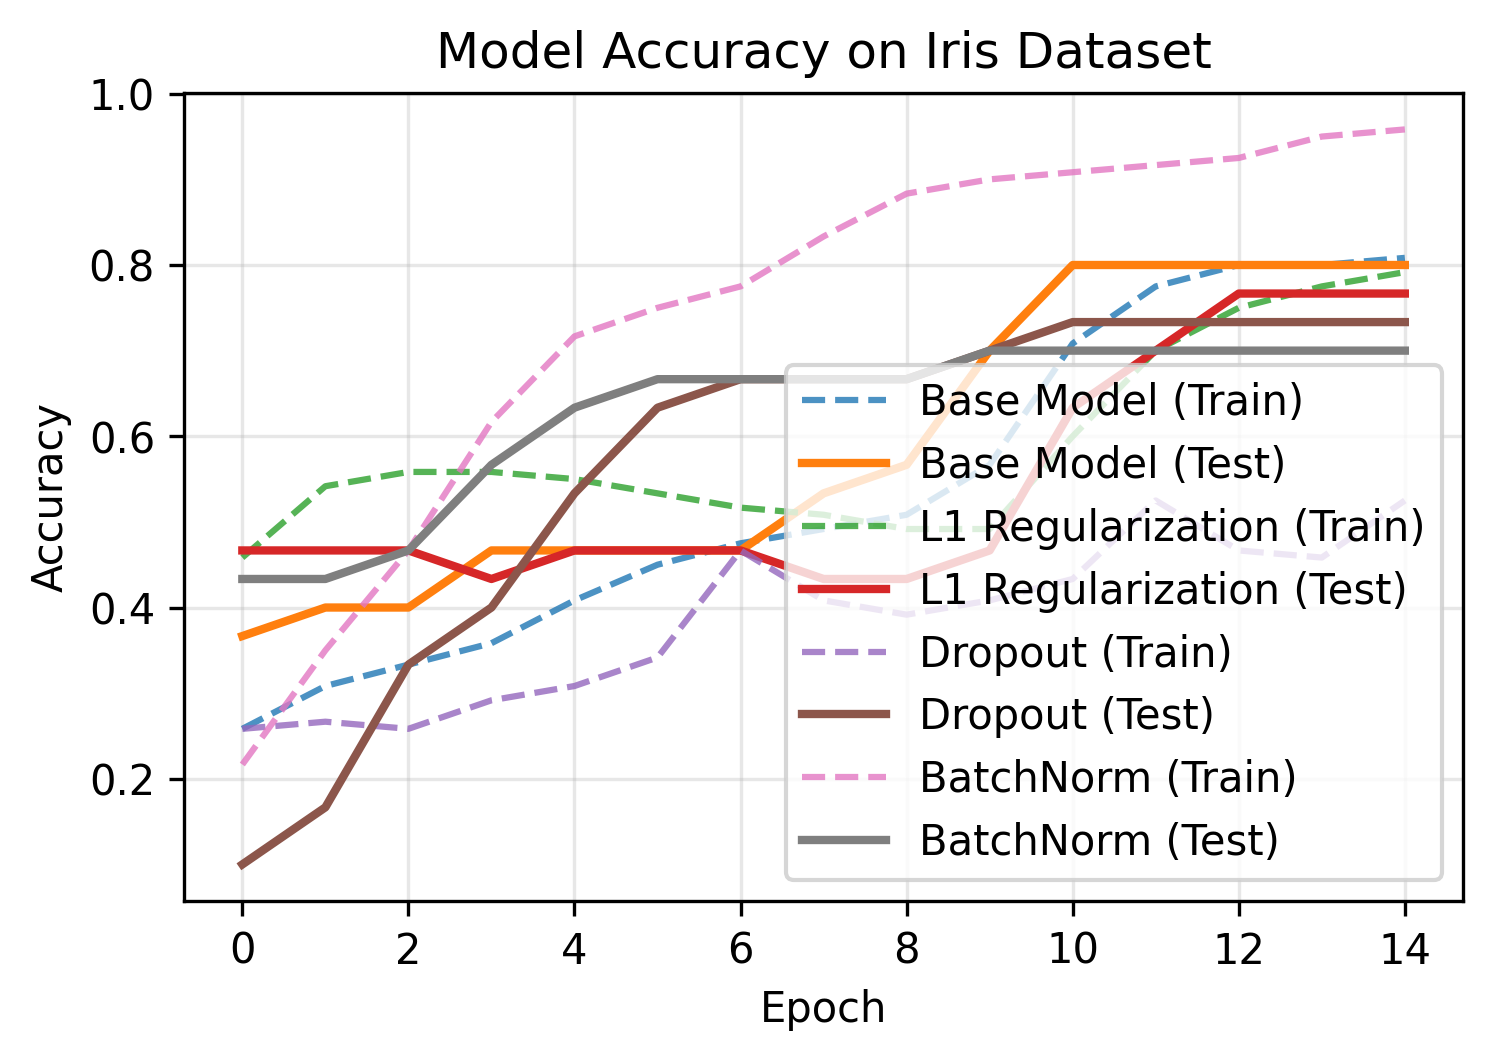

In [8]:
#| output: true
for name, history in history_dict.items():
    plt.plot(history.history['accuracy'],
             label=f'{name} (Train)',
             linestyle='--',
             alpha=0.8
    )
    plt.plot(history.history['val_accuracy'],
             label=f'{name} (Test)',
             linewidth=2
    )
plt.title('Model Accuracy on Iris Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

### Training and validation loss
` `

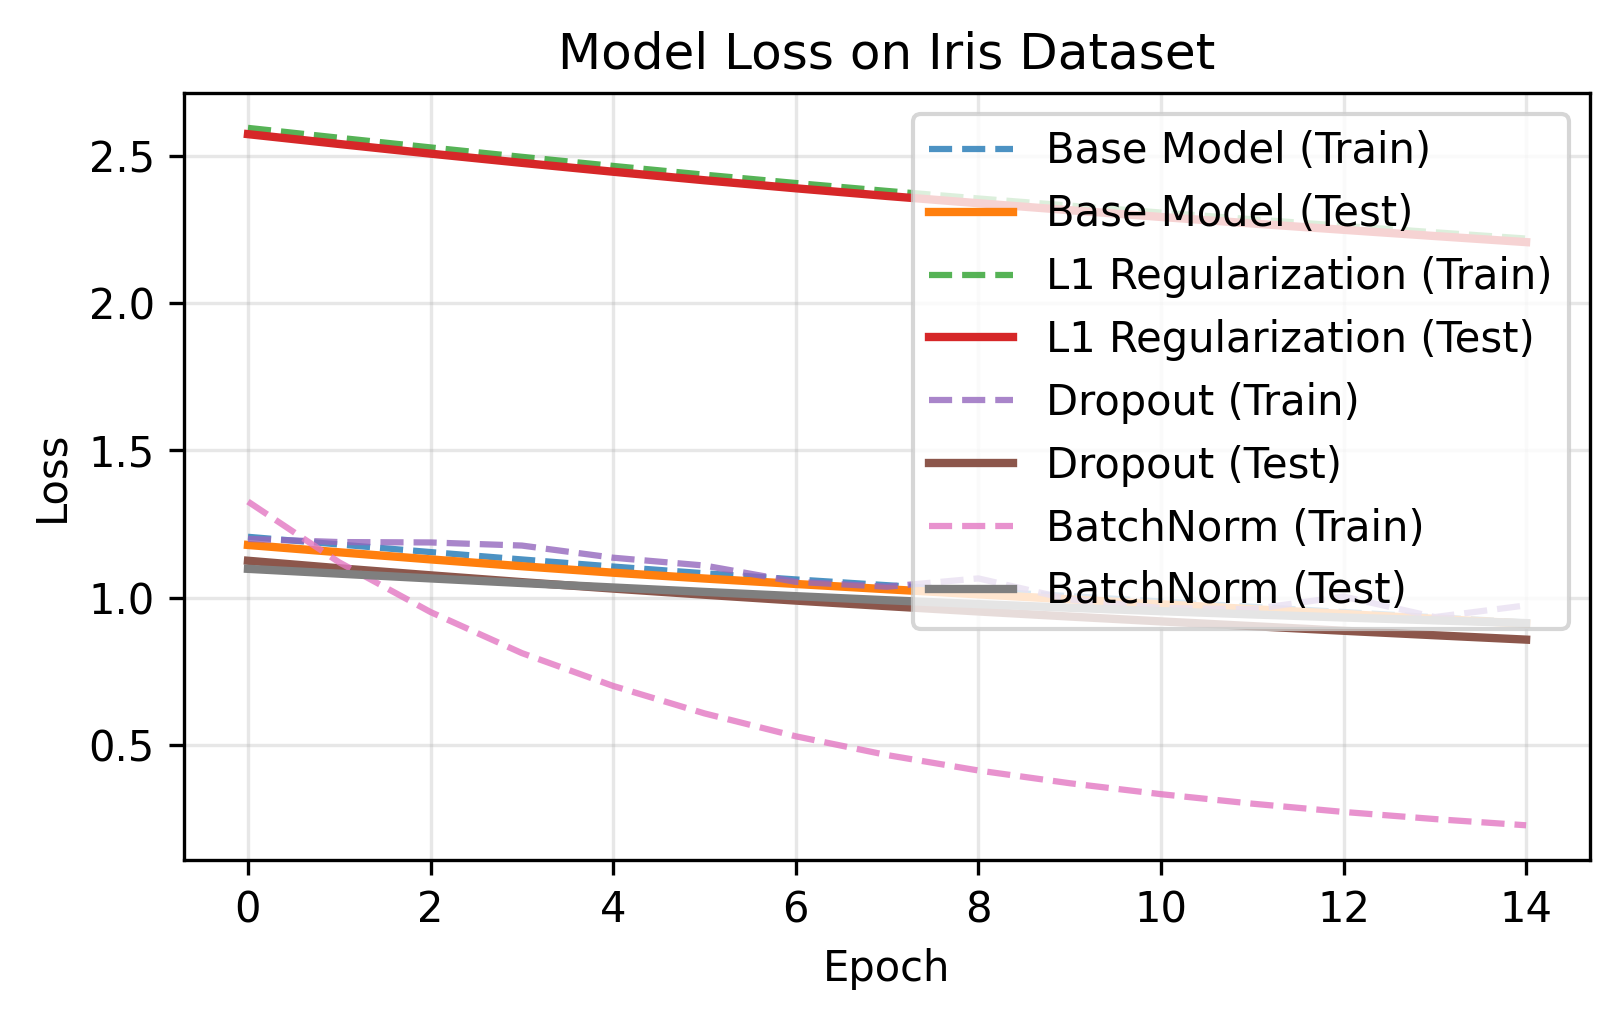

In [9]:
#| output: true
for name, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'{name} (Train)', linestyle='--', alpha=0.8)
    plt.plot(history.history['val_loss'], label=f'{name} (Test)', linewidth=2)
plt.title('Model Loss on Iris Dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Model comparison
Different models compared by parameters and size

In [10]:
#| output: true
print("\nModel Complexity (Number of Trainable Parameters):")
for name, model in models_dict.items():
    total_params = model.count_params()
    print(f"{name}: {total_params:,} parameters")


Model Complexity (Number of Trainable Parameters):
Base Model: 2,499 parameters
L1 Regularization: 2,499 parameters
Dropout: 2,499 parameters
BatchNorm: 2,883 parameters
